# Modeling & Evaluasi Dasar

In [1]:
import numpy as np
import pandas as pd

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Buat data dummy 100 baris untuk memastikan sebaran label memadai
np.random.seed(42)
n = 100
data = {
    'Enrolled': np.random.randint(300, 1200, n),
}
data['Present'] = [int(e * np.random.uniform(0.7, 0.98)) for e in data['Enrolled']]
data['Absent'] = [int(e * np.random.uniform(0.01, 0.2)) for e in data['Enrolled']]
# Koreksi agar Present + Absent <= Enrolled
for i in range(n):
    if data['Present'][i] + data['Absent'][i] > data['Enrolled'][i]:
        data['Absent'][i] = data['Enrolled'][i] - data['Present'][i]
data['Released_Early'] = [data['Enrolled'][i] - data['Present'][i] - data['Absent'][i] for i in range(n)]

df = pd.DataFrame(data)

In [14]:
# 2. Feature engineering & labeling
df['Attendance_Rate'] = df['Present'] / df['Enrolled'] * 100
df['Absence_Rate'] = df['Absent'] / df['Enrolled'] * 100
df['Early_Release_Rate'] = df['Released_Early'] / df['Enrolled'] * 100
df['Attendance_Label'] = df['Attendance_Rate'].apply(lambda x: 'High' if x >= 90 else 'Low')


In [15]:
# 3. Cek distribusi label:
label_counts = df['Attendance_Label'].value_counts().to_frame('count')


In [16]:
# 4. Split data dengan stratify
X = df[['Attendance_Rate', 'Absence_Rate', 'Early_Release_Rate']]
y = df['Attendance_Label'].map({'High': 1, 'Low': 0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [17]:
# 5. Standardisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


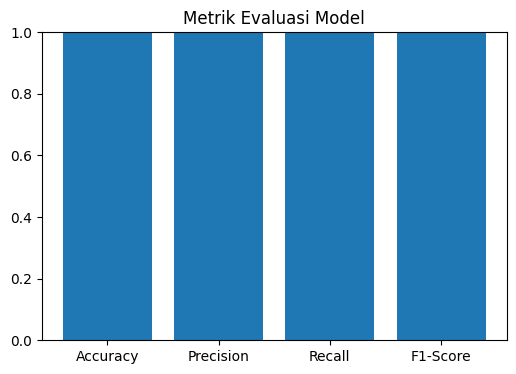

(                  count
 Attendance_Label       
 Low                  72
 High                 28,
 {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0})

In [18]:
# 6. Training & evaluasi
model = GaussianNB()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred)
}

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.bar(metrics.keys(), metrics.values())
plt.ylim(0, 1)
plt.title("Metrik Evaluasi Model")
plt.show()

label_counts, metrics